In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Design a machine learning model using k-means clustering approach to group the customers into different categories based their annual income and spending score. From the given data set, identify the number of clusters and group them with suitable labels. Visualize the result. 
Write you own method to decide the number of cluster and compare it with elbow method.

In [2]:
df=pd.read_csv("Mall_customers.csv")

In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
X=df.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

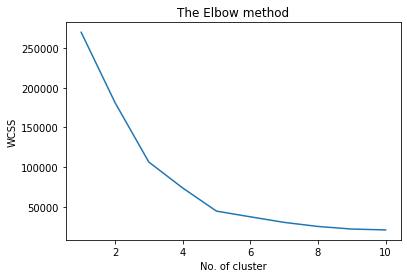

In [7]:
#Elbow method
plt.plot(range(1,11),wcss)
plt.title("The Elbow method")
plt.xlabel("No. of cluster")
plt.ylabel("WCSS")
plt.show()

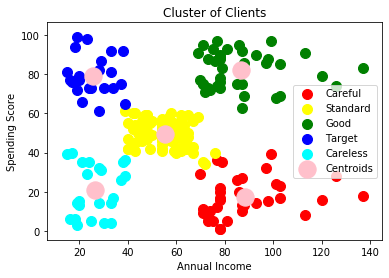

In [8]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(X)
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100,c='red',label='Careful')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100,c='yellow',label='Standard')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100,c='green',label='Good')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=100,c='blue',label='Target')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=100,c='cyan',label='Careless')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='pink',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()